In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# For data Peroscessing
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
# For machine learning
import tensorflow as tf
from keras.layers import *
from keras.losses import *
from keras.models import *
from keras.metrics import *
from keras.optimizers import *
from keras.applications import *
from keras.preprocessing.image import load_img
# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.style as style
style.use('ggplot')
# Misellaneous
from tqdm import tqdm
import os
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define paths
train_dir = '/kaggle/input/bonedataset/pre/train'
test_dir = '/kaggle/input/bonedataset/pre/test'
val_dir = '/kaggle/input/bonedataset/pre/validation'

Found 1913 images in 2 labels.


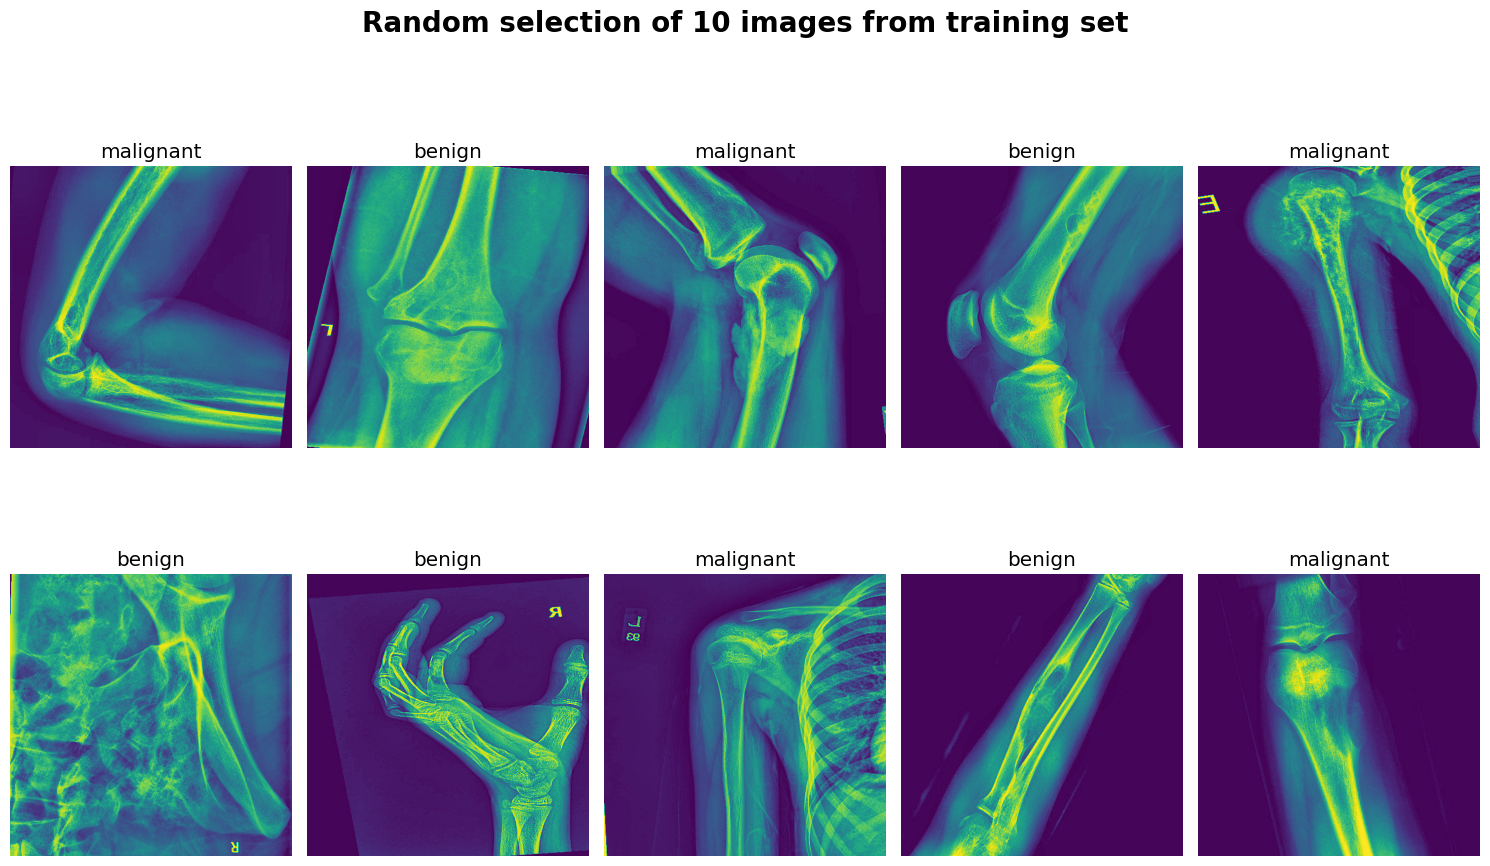

In [3]:
# Initialize lists to store image paths and labels
train_paths=[]
train_labels=[]

# Ensure the training directory exists
if not os.path.exists(train_dir):
    print(f"Training path does not exist: {train_dir}")

else:
    #Traverse subdirectories and files within the training directory
    for label in os.listdir(train_dir):
        label_path=os.path.join(train_dir, label)
        if os.path.isdir(label_path):
            for image in os.listdir(label_path):
                image_path=os.path.join(label_path, image)
                if os.path.isfile(image_path):
                    train_paths.append(image_path)
                    train_labels.append(label)
    
    # Shuffle the data
    train_paths, train_labels=shuffle(train_paths, train_labels)
    print(f"Found {len(train_paths)} images in {len(set(train_labels))} labels.")
    
    # Randomly select 10 images
    sample_indices=random.sample(range(len(train_paths)), 10)
    sample_paths=[train_paths[i] for i in sample_indices]
    sample_labels=[train_labels[i] for i in sample_indices]
    
    # Display the images and their labels
    plt.figure(figsize=(15, 10))
    for i, (path, label) in enumerate(zip(sample_paths, sample_labels)):
        img=mpimg.imread(path)
        plt.subplot(2, 5, i+1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.suptitle('Random selection of 10 images from training set',fontsize=20, fontweight='bold')
    plt.tight_layout()
    plt.show()

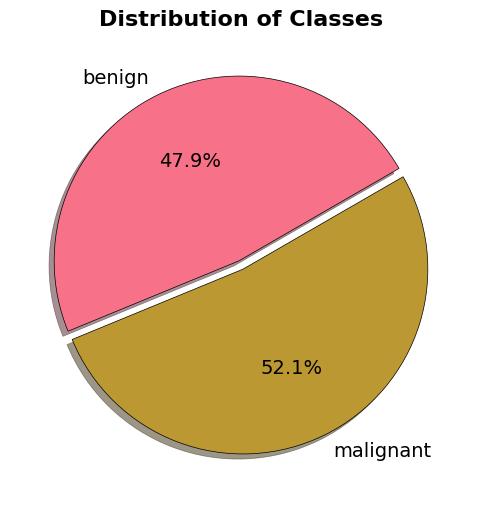

In [4]:
# Example data for labels and counts
labels=['benign', 'malignant']
counts=[
    len([x for x in train_labels if x == 'benign']),
    len([x for x in train_labels if x == 'malignant'])
]

# Setting Seaborn color palette
sns.set_palette("husl")

# Setting up the figure and size
plt.figure(figsize=(14, 6))
plt.rcParams.update({'font.size': 14})

# Pie chart using Seaborn
plt.pie(counts,
        labels=labels,
        autopct='%.1f%%',
        startangle=30,
        wedgeprops={'edgecolor': 'black'}, # Adding black edges to wedges
        explode=(0.025, 0.025), # Exploding the wedges
        shadow=True) # Adding shadows to wedges

# Title of the chart
plt.title('Distribution of Classes', fontsize=16, fontweight='bold')

# Displaying the chart
plt.show()

In [5]:
test_paths=[]
test_labels=[]
for label in os.listdir(test_dir):
    label_path=os.path.join(test_dir, label)
    if os.path.isdir(label_path):
        for image in os.listdir(label_path):
            image_path=os.path.join(label_path, image)
            if os.path.isfile(image_path):
                test_paths.append(image_path)
                test_labels.append(label)

# Shuffle the data
test_paths, test_labels=shuffle(test_paths, test_labels)
num_test_labels=5
print(f'\nThe first {num_test_labels} images in the Testing set are:\n{test_labels[:num_test_labels]}')


The first 5 images in the Testing set are:
['benign', 'benign', 'malignant', 'benign', 'malignant']


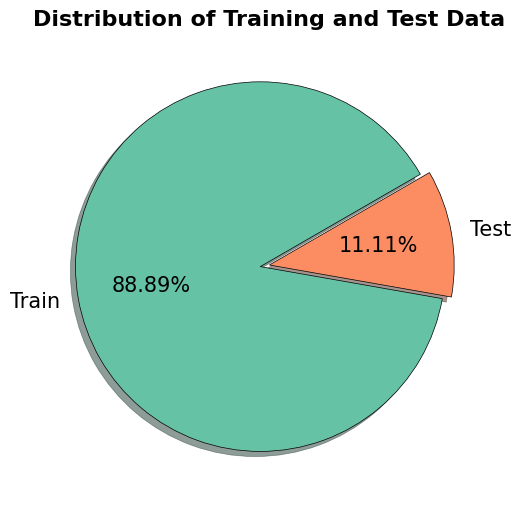

In [6]:
# Seatting Seaborn color palette
colors=sns.color_palette('Set2') # Selecting a Seaborn color palette
sns.set_palette(colors)

# Setting up the figure and size
plt.figure(figsize=(14, 6))
plt.rcParams.update({'font.size':15})

# Pie chart
plt.pie([len(train_labels), len(test_labels)],
        labels=['Train', 'Test'],
        autopct='%.2f%%',
        explode=(0.05, 0),
        startangle=30,
        wedgeprops={'edgecolor':'black'}, # Adding black edges to the wedges
        shadow=True) # True shadows to the wedges

# Title of the chart
plt.title('Distribution of Training and Test Data', fontsize=16, fontweight='bold')
plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=(0.95, 0.95),
    horizontal_flip=True,
    vertical_flip=True
)

validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(512, 512),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary',
    shuffle=True,
    seed=123
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(512, 512),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary',
    shuffle=True,
    seed=123
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(512, 512),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary',
    shuffle=False,
    seed=123
)

Found 1913 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 510, 510, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 253, 253, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   251,920,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,014,081 (961.36 MB)

 Trainable params: 252,014,081 (961.36 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
)

Epoch 1/25


I0000 00:00:1728149890.269771     132 service.cc:145] XLA service 0x7eff8c006640 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728149890.269823     132 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728149890.269827     132 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
2024-10-05 17:38:20.205575: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,32,255,255]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,253,253]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-10-05 17:38:20.511481: E external/local_xla/xla/service/sl

59/59 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.5084 - loss: 2.6431 - val_accuracy: 0.5759 - val_loss: 0.6846
Epoch 2/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.5625 - loss: 0.6880 - val_accuracy: 0.5625 - val_loss: 0.6876
Epoch 3/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 39s 583ms/step - accuracy: 0.5756 - loss: 0.6957 - val_accuracy: 0.5893 - val_loss: 0.6645
Epoch 4/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.7500 - loss: 0.6233 - val_accuracy: 0.5625 - val_loss: 0.6905
Epoch 5/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 39s 588ms/step - accuracy: 0.6036 - loss: 0.6678 - val_accuracy: 0.6295 - val_loss: 0.6310
Epoch 6/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.5938 - loss: 0.7214 - val_accuracy: 0.8125 - val_loss: 0.6075
Epoch 7/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 39s 589ms/step - accuracy: 0.6342 - loss: 0.6416 - val_accuracy: 0.5893 - val_loss: 0.6606
Epoch 8/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.6250 - loss: 0.6597 - val_accuracy: 0.6875 - val_

In [13]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Loss: {loss}, Accuracy: {accuracy}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.7035 - loss: 0.5735
Loss: 0.5614790320396423, Accuracy: 0.7208333611488342


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 727ms/step
Accuracy: 76.99%
precision: 77.78%
recall: 78.40%
f1: 78.09%
Confusion Matrix:
[[86 28]
 [27 98]]


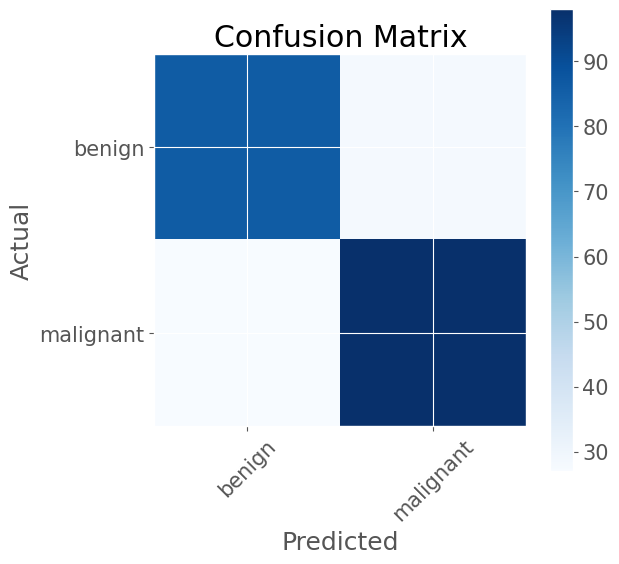

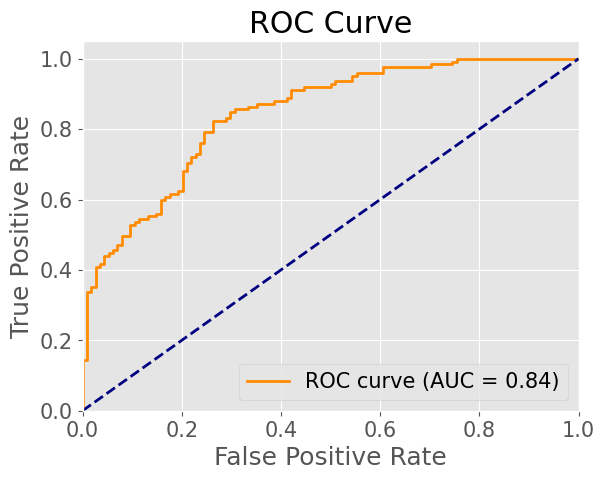

Overall AUC: 0.84


In [13]:
import numpy as np
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

class_names = ['benign', 'malignant']


test_predictions = model.predict(test_generator)
test_labels = test_generator.classes  


if test_predictions.shape[1] == 1:
    test_predictions = np.hstack((1 - test_predictions, test_predictions))


test_labels_bin = label_binarize(test_labels, classes=[0, 1])


if test_labels_bin.shape[1] == 1:
    test_labels_bin = np.hstack((1 - test_labels_bin, test_labels_bin))


predicted_classes = np.argmax(test_predictions, axis=1)

# Accuracy, Recall, Precision, & F1-Score
accuracy = accuracy_score(test_labels, predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")
precision = precision_score(test_labels, predicted_classes)
print(f"precision: {precision * 100:.2f}%")
recall = recall_score(test_labels, predicted_classes)
print(f"recall: {recall * 100:.2f}%")
f1 = f1_score(test_labels, predicted_classes)
print(f"f1: {f1 * 100:.2f}%")


# Calculate Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Calculate ROC curve
fpr, tpr, _ = roc_curve(test_labels, test_predictions[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


print(f"Overall AUC: {roc_auc:.2f}")


In [14]:
print(classification_report(test_labels, predicted_classes))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       114
           1       0.78      0.78      0.78       125

    accuracy                           0.77       239
   macro avg       0.77      0.77      0.77       239
weighted avg       0.77      0.77      0.77       239



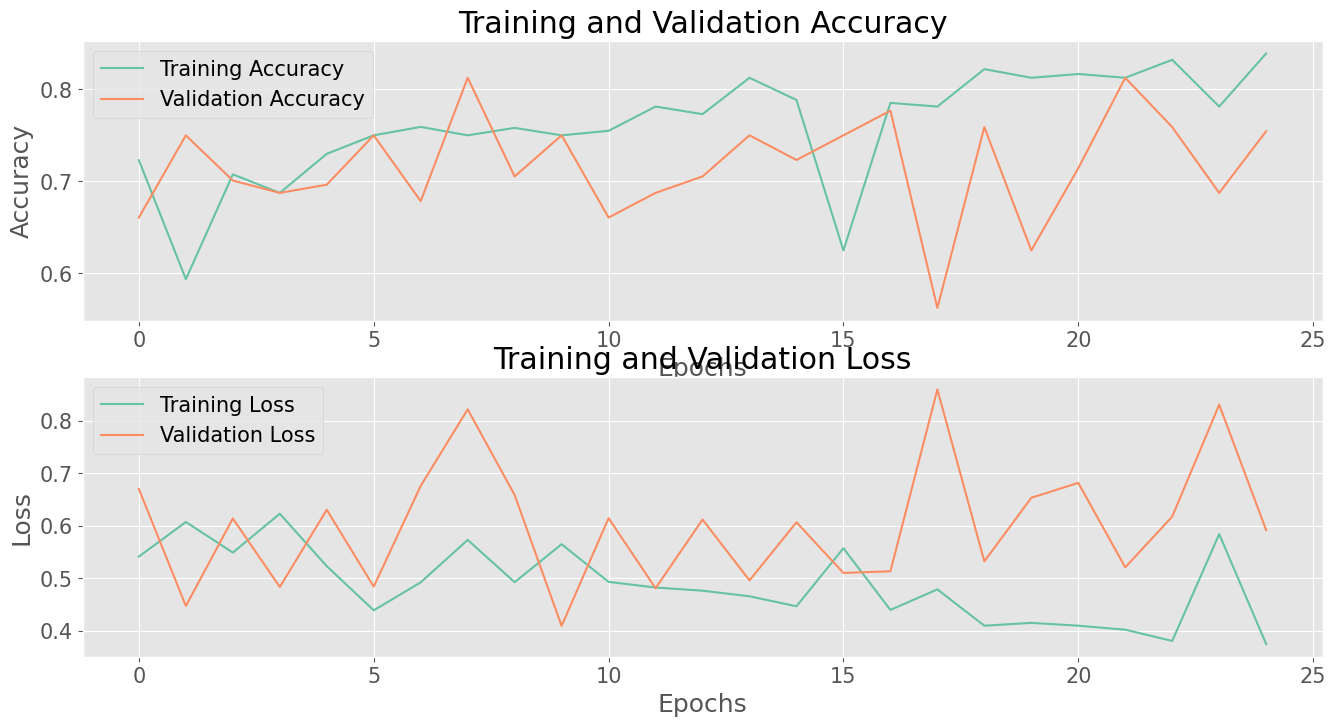

In [15]:
# Precision and loss data extraction for training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# epochs
epochs_range = range(len(acc))

# plot(accuracy)
plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# plot(loss)
plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [10]:
model.save('/kaggle/working/from_scratch_model.h5', include_optimizer=False)

In [7]:
# Loading the pre-trained model (VGG16) without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(512, 512, 3))

# Add custom layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use GlobalAveragePooling instead of Flatten to reduce parameters
x = Dense(1024, activation='relu')(x)  # Fully Connected dense layer with ReLU activation
x = Dropout(0.3)(x)  # Dropout to reduce Overfitting
x = Dense(512, activation='relu')(x)  # Another dense layer with ReLU activation
x = Dropout(0.3)(x)  # Dropout
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained model (do not update the weights)
for layer in base_model.layers:
    layer.trainable = False

# Assemble the model using the appropriate Optimizer and Loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# View model summary
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 512, 512, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 512, 512, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 256, 256, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 256, 256, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 128, 128, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 128, 128, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 128, 128, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 64, 64, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 64, 64, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 64, 64, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 32, 32, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 15,765,313 (60.14 MB)

 Trainable params: 1,050,625 (4.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=(0.95, 0.95),
    horizontal_flip=True,
    vertical_flip=True
)

validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(512, 512),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=123
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(512, 512),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=123
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(512, 512),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    seed=123
)

Found 1913 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [11]:
# Open some of the last layers of the basic model
for layer in base_model.layers[-3:]:  # Open the last 3 layers
    layer.trainable = True

# Model reassembly with low learning rate for fine-tuning
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model again with the open layers
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.8932 - loss: 0.2552 - val_accuracy: 0.8839 - val_loss: 0.3472
Epoch 2/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.1300 - val_accuracy: 1.0000 - val_loss: 0.0539
Epoch 3/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.9186 - loss: 0.1987 - val_accuracy: 0.8839 - val_loss: 0.3304
Epoch 4/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8438 - loss: 0.3321 - val_accuracy: 0.9375 - val_loss: 0.1759
Epoch 5/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.9404 - loss: 0.1735 - val_accuracy: 0.8616 - val_loss: 0.3751
Epoch 6/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9062 - loss: 0.1912 - val_accuracy: 0.8750 - val_loss: 0.2210
Epoch 7/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9381 - loss: 0.1879 - val_accuracy: 0.8616 - val_loss: 0.3645
Epoch 8/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9688 - loss: 0.0959 - val_accuracy: 0.7500 - val_

In [14]:
model.save('/kaggle/working/bone_cancer_detection_model.h5')

In [15]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Loss: {loss}, Accuracy: {accuracy}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 575ms/step - accuracy: 0.9193 - loss: 0.3276
Loss: 0.30557581782341003, Accuracy: 0.9208333492279053


8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step 
Accuracy: 95.40%
precision: 93.18%
recall: 98.40%
f1: 95.72%
Confusion Matrix:
[[105   9]
 [  2 123]]


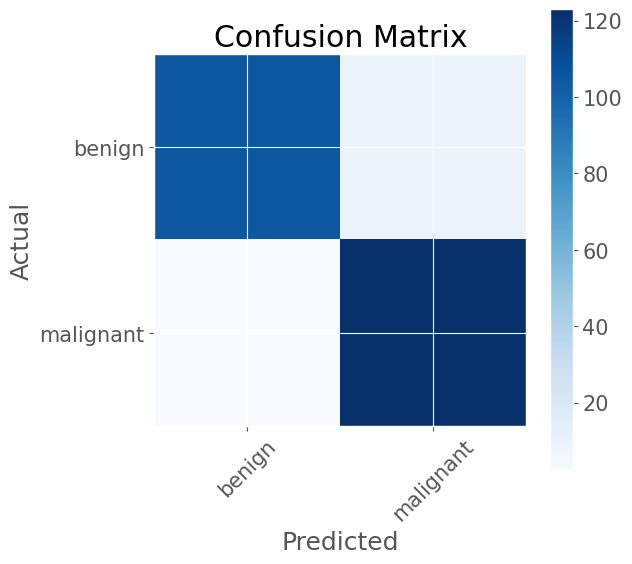

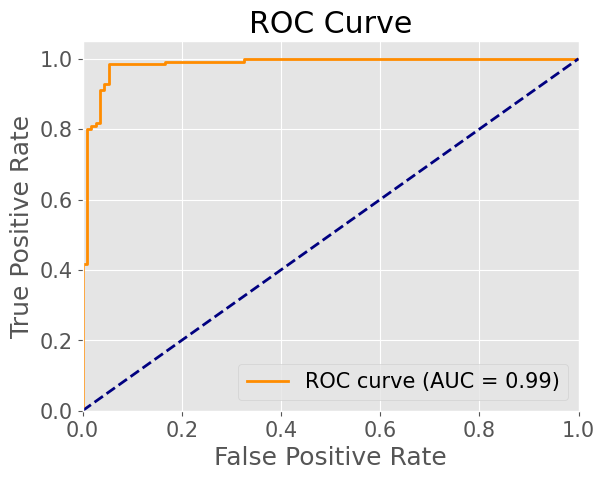

Overall AUC: 0.99


In [16]:
import numpy as np
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

class_names = ['benign', 'malignant']


test_predictions = model.predict(test_generator)
test_labels = test_generator.classes  


if test_predictions.shape[1] == 1:
    test_predictions = np.hstack((1 - test_predictions, test_predictions))


test_labels_bin = label_binarize(test_labels, classes=[0, 1])


if test_labels_bin.shape[1] == 1:
    test_labels_bin = np.hstack((1 - test_labels_bin, test_labels_bin))


predicted_classes = np.argmax(test_predictions, axis=1)

# Accuracy, Recall, Precision, & F1-Score
accuracy = accuracy_score(test_labels, predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")
precision = precision_score(test_labels, predicted_classes)
print(f"precision: {precision * 100:.2f}%")
recall = recall_score(test_labels, predicted_classes)
print(f"recall: {recall * 100:.2f}%")
f1 = f1_score(test_labels, predicted_classes)
print(f"f1: {f1 * 100:.2f}%")


# Calculate Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Calculate ROC curve
fpr, tpr, _ = roc_curve(test_labels, test_predictions[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


print(f"Overall AUC: {roc_auc:.2f}")


In [17]:
print(classification_report(test_labels, predicted_classes))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       114
           1       0.93      0.98      0.96       125

    accuracy                           0.95       239
   macro avg       0.96      0.95      0.95       239
weighted avg       0.96      0.95      0.95       239



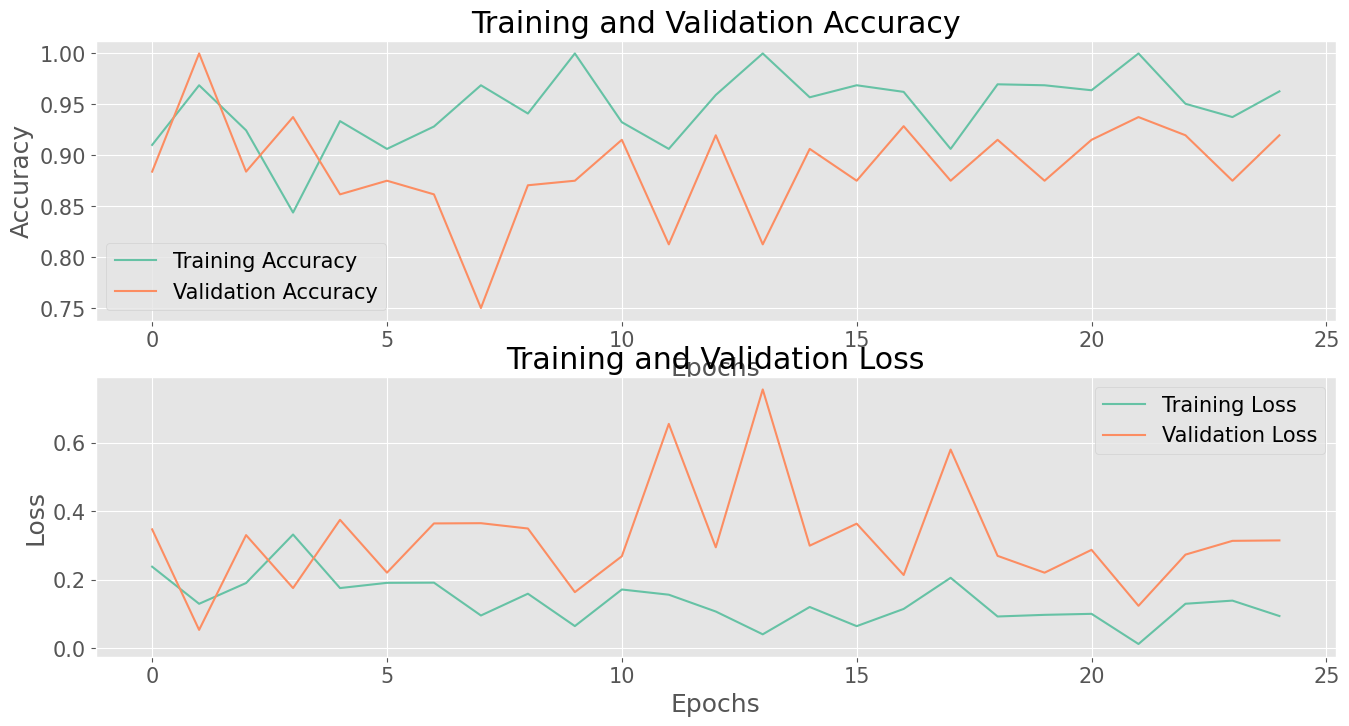

In [18]:
# Precision and loss data extraction for training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# epochs
epochs_range = range(len(acc))

# plot(accuracy)
plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# plot(loss)
plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()